In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('online_profit.csv')

In [3]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,NaN,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,NaN,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [4]:
df.isnull().sum()

Marketing Spend    2
Administration     0
Transport          0
Area               3
Profit             1
dtype: int64

In [5]:
mean = df['Marketing Spend'].mean()

In [6]:
mean

70691.35312500001

In [7]:
df['Marketing Spend'] = df['Marketing Spend'].fillna(mean)

In [8]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.610000,136897.80,471784.10,Dhaka,192261.83
1,70691.353125,151377.59,443898.53,Ctg,191792.06
2,153441.510000,101145.55,407934.54,NaN,191050.39
3,144372.410000,118671.85,383199.62,Dhaka,182901.99
4,142107.340000,91391.77,366168.42,Rangpur,166187.94


In [9]:
df['Area'] = df['Area'].fillna(method='ffill')

In [10]:
median = df['Profit'].median()

In [11]:
median

107404.34

In [12]:
df['Profit'] = df['Profit'].fillna(median)

In [13]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.610000,136897.80,471784.10,Dhaka,192261.83
1,70691.353125,151377.59,443898.53,Ctg,191792.06
2,153441.510000,101145.55,407934.54,Ctg,191050.39
3,144372.410000,118671.85,383199.62,Dhaka,182901.99
4,142107.340000,91391.77,366168.42,Rangpur,166187.94


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label = LabelEncoder()

In [16]:
df.Area = label.fit_transform(df['Area'])

In [17]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.610000,136897.80,471784.10,1,192261.83
1,70691.353125,151377.59,443898.53,0,191792.06
2,153441.510000,101145.55,407934.54,0,191050.39
3,144372.410000,118671.85,383199.62,1,182901.99
4,142107.340000,91391.77,366168.42,2,166187.94


In [18]:
new_df = df.drop("Area",axis=1)

In [19]:
new_df.head()

,Marketing Spend,Administration,Transport,Profit
0,114523.610000,136897.80,471784.10,192261.83
1,70691.353125,151377.59,443898.53,191792.06
2,153441.510000,101145.55,407934.54,191050.39
3,144372.410000,118671.85,383199.62,182901.99
4,142107.340000,91391.77,366168.42,166187.94


In [20]:
df = pd.concat([new_df,df.Area],axis=1)

In [21]:
df.head()

,Marketing Spend,Administration,Transport,Profit,Area
0,114523.610000,136897.80,471784.10,192261.83,1
1,70691.353125,151377.59,443898.53,191792.06,0
2,153441.510000,101145.55,407934.54,191050.39,0
3,144372.410000,118671.85,383199.62,182901.99,1
4,142107.340000,91391.77,366168.42,166187.94,2


In [22]:
x = df.drop(['Profit'], axis=1)

In [23]:
y = df['Profit']

In [24]:
x.head()

,Marketing Spend,Administration,Transport,Area
0,114523.610000,136897.80,471784.10,1
1,70691.353125,151377.59,443898.53,0
2,153441.510000,101145.55,407934.54,0
3,144372.410000,118671.85,383199.62,1
4,142107.340000,91391.77,366168.42,2


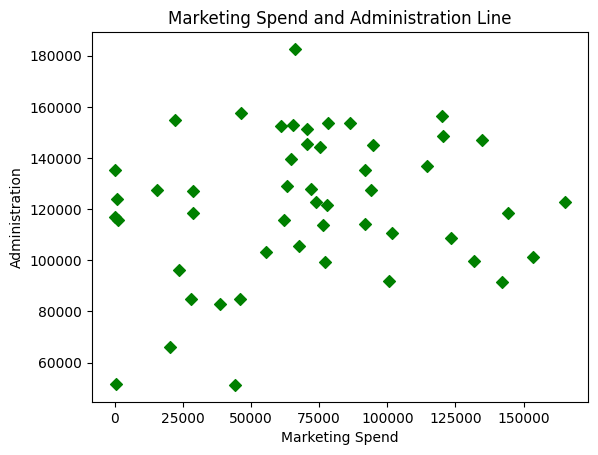

In [25]:
plt.title("Marketing Spend and Administration Line")
plt.xlabel("Marketing Spend")
plt.ylabel("Administration")
plt.scatter(df['Marketing Spend'],df['Administration'],marker="D",color="Green")

<AxesSubplot: xlabel='Marketing Spend', ylabel='Count'>

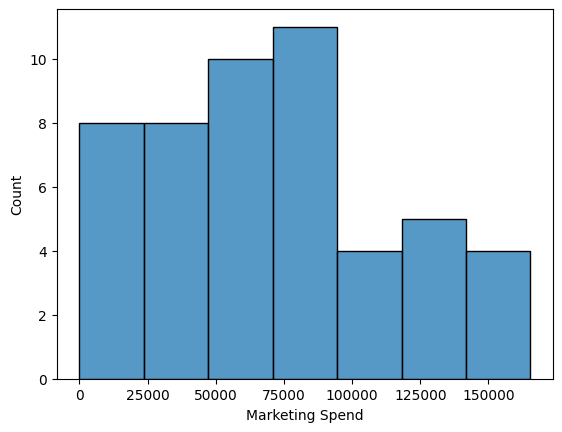

In [26]:
sns.histplot(df['Marketing Spend'])

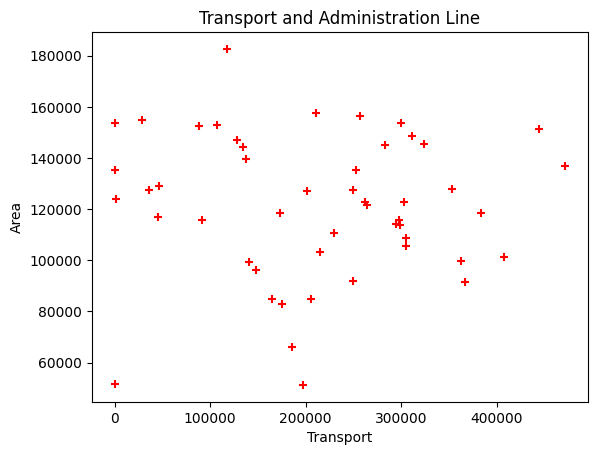

In [27]:
plt.title("Transport and Administration Line")
plt.xlabel("Transport")
plt.ylabel("Area")
plt.scatter(df['Transport'],df['Administration'],marker="+",color="Red")

<AxesSubplot: xlabel='Administration', ylabel='Count'>

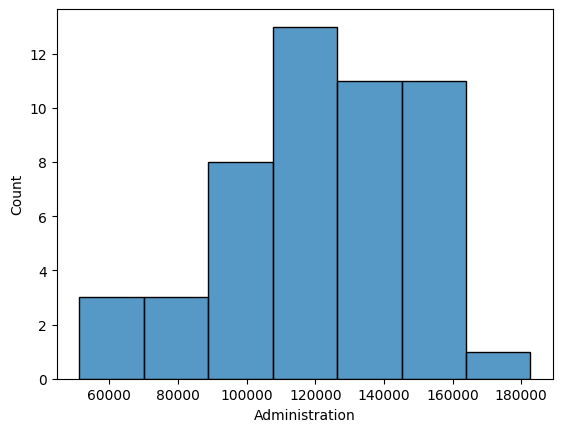

In [28]:
sns.histplot(df['Administration'])

<AxesSubplot: xlabel='Transport', ylabel='Count'>

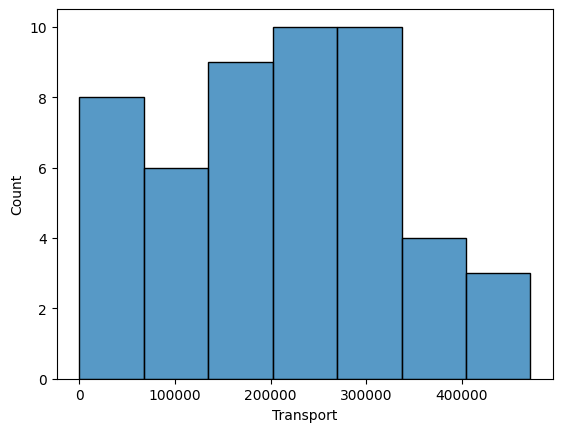

In [29]:
sns.histplot(df['Transport'])

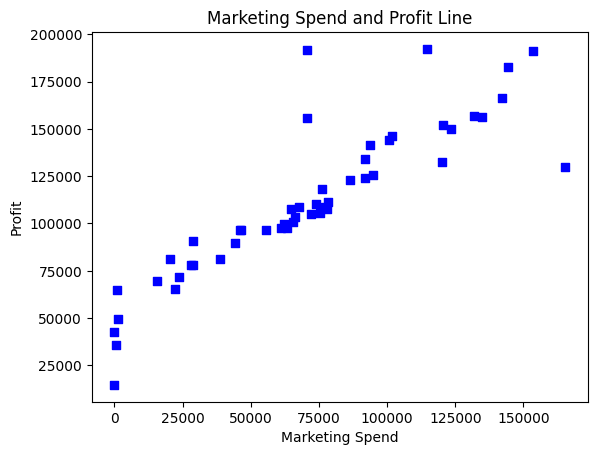

In [30]:
plt.title("Marketing Spend and Profit Line")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.scatter(df['Marketing Spend'],df['Profit'],marker="s",color="Blue")

<AxesSubplot: xlabel='Profit', ylabel='Count'>

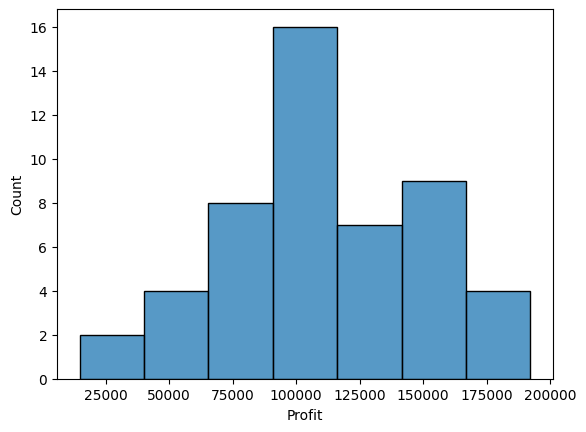

In [31]:
sns.histplot(df['Profit'])

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70,random_state=42)

In [34]:
xtrain.shape

(35, 4)

In [35]:
xtest.shape

(15, 4)

In [36]:
ytrain.shape

(35,)

In [37]:
ytest.shape

(15,)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
reg = LinearRegression()

In [40]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [41]:
ytest

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
12    141585.52
4     166187.94
37     89949.14
8     152211.77
3     182901.99
Name: Profit, dtype: float64

In [42]:
reg.score(xtest.values,ytest)

0.869455266069295

In [43]:
reg.coef_

array([ 5.54748049e-01,  1.68956500e-01,  1.53214648e-01, -3.02864976e+03])

In [44]:
reg.intercept_

19839.284443228476

In [45]:
reg.predict([[142107.34,91391.77,366168.42,1]])

array([167188.00330213])